## DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

### Importing Data and Data Preparation

In [2]:
Customer_Acquisition = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
Spend = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\Case Study 2 - Credit Card Case Study\spend.csv")
Repayment = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\Case Study 2 - Credit Card Case Study\Repayment.csv")

In [3]:
Customer_Acquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
Spend

,SL,Customer,Month,Type,Spend_Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [5]:
Repayment

,SL No:,Customer,Month,Repayment_Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,3-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496,A67,9-May-05,55638.77
1496,1497,A68,10-May-06,319836.49
1497,1498,A69,11-Jul-06,247628.45
1498,1499,A70,12-Aug-05,454016.51


In [6]:
Repayment = Repayment.drop('SL No:',axis=1)

In [7]:
Customer_Acquisition = Customer_Acquisition.drop('No',axis=1)

In [8]:
# Merge Spend and Repayment dataframes based on Customer and Month
merged_spend_repayment = pd.merge(Spend, Repayment, on=['Customer', 'Month'], suffixes=('_Spend', '_Repayment'))

# Merge merged_spend_repayment with Customer_Acquisition based on Customer
merged_df = pd.merge(Customer_Acquisition, merged_spend_repayment, on='Customer', how='left')

In [9]:
merged_df

,Customer,Age,City,Product,Limit,Company,Segment,SL,Month,Type,Spend_Amount,Repayment_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,350446.82
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,103,12-Jan-04,TRAIN TICKET,440563.22,495414.75
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,103,12-Jan-04,TRAIN TICKET,440563.22,350446.82
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,245899.02
...,...,...,...,...,...,...,...,...,...,...,...,...
858,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,310992.30
859,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,121874.90
860,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,337815.57
861,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,25682.73


In [10]:
merged_df['Month'] = pd.to_datetime(merged_df['Month'])

In [11]:
merged_df.dtypes

Customer                    object
Age                          int64
City                        object
Product                     object
Limit                      float64
Company                     object
Segment                     object
SL                           int64
Month               datetime64[ns]
Type                        object
Spend_Amount               float64
Repayment_Amount           float64
dtype: object

In [12]:
# Create 'Month_of_Year' and 'Year' columns
merged_df['Month_of_Year'] = merged_df['Month'].dt.month
merged_df['Year'] = merged_df['Month'].dt.year

In [13]:
merged_df.head()                  # View first 5 rows

,Customer,Age,City,Product,Limit,Company,Segment,SL,Month,Type,Spend_Amount,Repayment_Amount,Month_of_Year,Year
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,495414.75,1,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,350446.82,1,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,103,2004-01-12,TRAIN TICKET,440563.22,495414.75,1,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,103,2004-01-12,TRAIN TICKET,440563.22,350446.82,1,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,245899.02,1,2004


In [14]:
merged_df.tail()          # View last 5 rows

,Customer,Age,City,Product,Limit,Company,Segment,SL,Month,Type,Spend_Amount,Repayment_Amount,Month_of_Year,Year
858,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,310992.30,1,2004
859,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26,121874.90,1,2004
860,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06,337815.57,1,2004
861,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22,25682.73,1,2004
862,A100,36,COCHIN,Silver,100000.0,C5,Salaried_MNC,102,2004-01-25,BUS TICKET,224786.88,69551.19,1,2004


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer          863 non-null    object        
 1   Age               863 non-null    int64         
 2   City              863 non-null    object        
 3   Product           863 non-null    object        
 4   Limit             863 non-null    float64       
 5   Company           863 non-null    object        
 6   Segment           863 non-null    object        
 7   SL                863 non-null    int64         
 8   Month             863 non-null    datetime64[ns]
 9   Type              863 non-null    object        
 10  Spend_Amount      863 non-null    float64       
 11  Repayment_Amount  863 non-null    float64       
 12  Month_of_Year     863 non-null    int64         
 13  Year              863 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
merged_df.describe()               # 5-point summary

,Age,Limit,SL,Spend_Amount,Repayment_Amount,Month_of_Year,Year
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,43.944380,317323.827346,689.216686,239715.447312,256472.996141,2.907300,2004.778679
std,17.790849,214803.882823,453.402909,144256.512712,144701.012297,2.651573,0.815118
min,12.000000,10000.000000,1.000000,2050.460000,2273.980000,1.000000,2004.000000
25%,28.000000,100001.000000,229.000000,113443.410000,129958.930000,1.000000,2004.000000
50%,43.000000,500000.000000,724.000000,229296.580000,262549.830000,2.000000,2005.000000
75%,57.000000,500000.000000,1028.500000,363176.430000,379170.050000,4.000000,2005.000000
max,79.000000,500000.000000,1491.000000,499270.000000,498705.930000,12.000000,2006.000000


In [17]:
merged_df.describe(include="all")         # 5-point summary

,Customer,Age,City,Product,Limit,Company,Segment,SL,Month,Type,Spend_Amount,Repayment_Amount,Month_of_Year,Year
count,863,863.000000,863,863,863.000000,863,863,863.000000,863,863,863.000000,863.000000,863.000000,863.000000
unique,100,NaN,8,3,NaN,41,5,NaN,74,15,NaN,NaN,NaN,NaN
top,A60,NaN,BANGALORE,Gold,NaN,C22,Normal Salary,NaN,2004-01-15 00:00:00,CAMERA,NaN,NaN,NaN,NaN
freq,41,NaN,176,374,NaN,91,228,NaN,101,123,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,43.944380,NaN,NaN,317323.827346,NaN,NaN,689.216686,NaN,NaN,239715.447312,256472.996141,2.907300,2004.778679
std,NaN,17.790849,NaN,NaN,214803.882823,NaN,NaN,453.402909,NaN,NaN,144256.512712,144701.012297,2.651573,0.815118
min,NaN,12.000000,NaN,NaN,10000.000000,NaN,NaN,1.000000,NaN,NaN,2050.460000,2273.980000,1.000000,2004.000000
25%,NaN,28.000000,NaN,NaN,100001.000000,NaN,NaN,229.000000,NaN,NaN,113443.410000,129958.930000,1.000000,2004.000000


In [18]:
merged_df.isnull().sum()              #Checking if their null or missing values

Customer            0
Age                 0
City                0
Product             0
Limit               0
Company             0
Segment             0
SL                  0
Month               0
Type                0
Spend_Amount        0
Repayment_Amount    0
Month_of_Year       0
Year                0
dtype: int64

In [19]:
merged_df.duplicated()           #Checking Duplicate Records

0      False
1      False
2      False
3      False
4      False
       ...  
858    False
859    False
860    False
861    False
862    False
Length: 863, dtype: bool

### 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.

In [20]:
mean_age = merged_df['Age'].mean() 

# Replace ages less than 18 with the mean age
merged_df.loc[merged_df['Age'] < 18, 'Age'] = mean_age

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [21]:
# Replacing spend amounts exceeding the limit with 50% of the customer's limit
merged_df['Spend_Amount'] = merged_df.apply(lambda row: row['Limit'] * 0.5 if row['Spend_Amount'] > row['Limit'] else row['Spend_Amount'], axis=1)

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [22]:
# Replace repayment amounts exceeding the limit with the limit
merged_df['Repayment_Amount'] = merged_df.apply(lambda row: row['Limit'] if row['Repayment_Amount'] > row['Limit'] else row['Repayment_Amount'], axis=1)

### 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [23]:
distinct_customers = merged_df['Customer'].nunique()
distinct_customers

100

### 2. b. How many distinct categories exist?

In [24]:
distinct_categories = merged_df['Product'].nunique()
distinct_categories

3

### 2. c. What is the average monthly spend by customers?

In [25]:
average_monthly_spend = merged_df.groupby('Customer')['Spend_Amount'].mean()
average_monthly_spend

Customer
A1      303079.561667
A10     170074.641429
A100     50000.000000
A11     235621.461250
A12     272459.301176
            ...      
A95     240401.500000
A96      54729.660000
A97       5000.000000
A98       5000.500000
A99       5001.000000
Name: Spend_Amount, Length: 100, dtype: float64

### 2. d. What is the average monthly repayment by customers?

In [26]:
average_monthly_repayment = merged_df.groupby('Customer')['Repayment_Amount'].mean()
average_monthly_repayment

Customer
A1      290538.023889
A10     226363.345714
A100     69551.190000
A11     312126.122500
A12     276375.051176
            ...      
A95     369405.960000
A96     100000.000000
A97      10000.000000
A98      10001.000000
A99      10002.000000
Name: Repayment_Amount, Length: 100, dtype: float64

### 2. e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [27]:
# Calculate monthly profit (repayment - spend)
merged_df['Monthly_Profit'] = merged_df['Repayment_Amount'] - merged_df['Spend_Amount']

# Calculate interest earned on positive profits at the monthly rate of 2.9%
monthly_interest_rate = 0.029  # Monthly interest rate
merged_df['Interest_Earned'] = merged_df['Monthly_Profit'].apply(lambda x: x * monthly_interest_rate if x > 0 else 0)

# Final profit for the bank for each month (monthly profit - interest earned)
merged_df['Final_Profit'] = merged_df['Monthly_Profit'] - merged_df['Interest_Earned']

In [28]:
merged_df['Final_Profit']

0        9655.57545
1     -135023.98000
2       53260.83563
3      -90116.40000
4     -164657.11000
           ...     
858     43957.50014
859      4855.00000
860      4855.48550
861      4855.97100
862     18984.20549
Name: Final_Profit, Length: 863, dtype: float64

In [29]:
merged_df

,Customer,Age,City,Product,Limit,Company,Segment,SL,Month,Type,Spend_Amount,Repayment_Amount,Month_of_Year,Year,Monthly_Profit,Interest_Earned,Final_Profit
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,495414.75,1,2004,9943.95,288.37455,9655.57545
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,350446.82,1,2004,-135023.98,0.00000,-135023.98000
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,2004-01-12,TRAIN TICKET,440563.22,495414.75,1,2004,54851.53,1590.69437,53260.83563
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,2004-01-12,TRAIN TICKET,440563.22,350446.82,1,2004,-90116.40,0.00000,-90116.40000
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,245899.02,1,2004,-164657.11,0.00000,-164657.11000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,100000.00,1,2004,45270.34,1312.83986,43957.50014
859,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,10000.00,1,2004,5000.00,145.00000,4855.00000
860,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,10001.00,1,2004,5000.50,145.01450,4855.48550
861,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,10002.00,1,2004,5001.00,145.02900,4855.97100


### 2. f. What are the top 5 product types?

In [30]:
merged_df['Type'].value_counts().head(5)

CAMERA        123
PETRO          98
FOOD           86
CLOTHES        64
AIR TICKET     64
Name: Type, dtype: int64

In [31]:
merged_df.groupby('Type')['Spend_Amount'].sum().nlargest(5)

Type
CAMERA          19943003.00
PETRO           13667106.67
FOOD            12888728.98
BUS TICKET      11449175.92
MOVIE TICKET    10123108.77
Name: Spend_Amount, dtype: float64

In [32]:
merged_df.groupby('Type')['Repayment_Amount'].sum().nlargest(5)

Type
CAMERA        23186038.00
PETRO         14992949.20
FOOD          14832918.90
AIR TICKET    12138320.15
BUS TICKET    10912776.75
Name: Repayment_Amount, dtype: float64

### 2. g. Which city is having maximum spend?

In [33]:
merged_df.groupby('City')['Spend_Amount'].sum().idxmax()

'COCHIN'

In [34]:
merged_df[['City','Spend_Amount']].groupby('City').sum().sort_values(["Spend_Amount"],ascending = False).head(1)

,Spend_Amount
City,
COCHIN,27653817.49


### 2. h. Which age group is spending more money?

In [35]:
# age groups based on ranges 
bins = [0, 20, 30, 40, 50, 60, 100]  # age bins
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']  # Labels for age groups
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)

# Group by age group and calculate total spend
age_group_spending = merged_df.groupby('Age_Group')['Spend_Amount'].sum()

# age group with the highest total spending
age_group_spending.idxmax()

'41-50'

### 2. i. Who are the top 10 customers in terms of repayment?

In [36]:
merged_df.groupby('Customer')['Repayment_Amount'].sum().nlargest(10)      # top 10 customers in terms of repayment

Customer
A60    10428573.54
A61     8617285.78
A44     8227149.65
A43     7963202.15
A45     7075094.55
A13     6479204.24
A38     6404899.90
A42     6181774.14
A41     5667620.30
A39     5534957.87
Name: Repayment_Amount, dtype: float64

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [37]:
city_product_spend_yearly = pd.pivot_table(data = merged_df,index=['City','Year'],columns='Product', values='Spend_Amount', aggfunc='sum')
city_product_spend_yearly

Product                Gold    Platimum      Silver
City       Year                                    
BANGALORE  2004  9953342.66   700899.56  1089383.07
           2005  8226892.18   686106.18    80066.94
           2006  5470495.35   189098.38   403935.64
BOMBAY     2004  8829107.79   815564.17   732089.03
           2005  3320901.75   291794.44   158988.54
           2006  3490846.69   492541.33   674797.30
CALCUTTA   2004  7496411.13  2706285.45   400005.00
           2005  5603651.51  3800427.46   147380.56
           2006  5025299.45   765502.96   732224.07
CHENNAI    2004  1157489.57  3580099.62   182053.86
           2005  1040038.69  1991635.68   102771.82
           2006   176726.17  1658557.99   150003.50
COCHIN     2004  7209014.44  2873519.71   646599.46
           2005  6655251.00  2608262.17   200003.50
           2006  4425012.70  2499512.69   536641.82
DELHI      2004  3880542.73    50001.50   504492.90
           2005   947109.76   185238.64   275081.67
           2006  2230568.57    76785.72   174570.98
PATNA      2004  2465165.30         NaN   805954.30
           2005   221293.03  1254215.44   434786.32
           2006   355605.76   659200.22   400001.00
TRIVANDRUM 2004  1413567.43  2823327.43   209667.48
           2005   237335.43  2501029.85    50000.50
           2006   502731.73   937471.52   292103.82

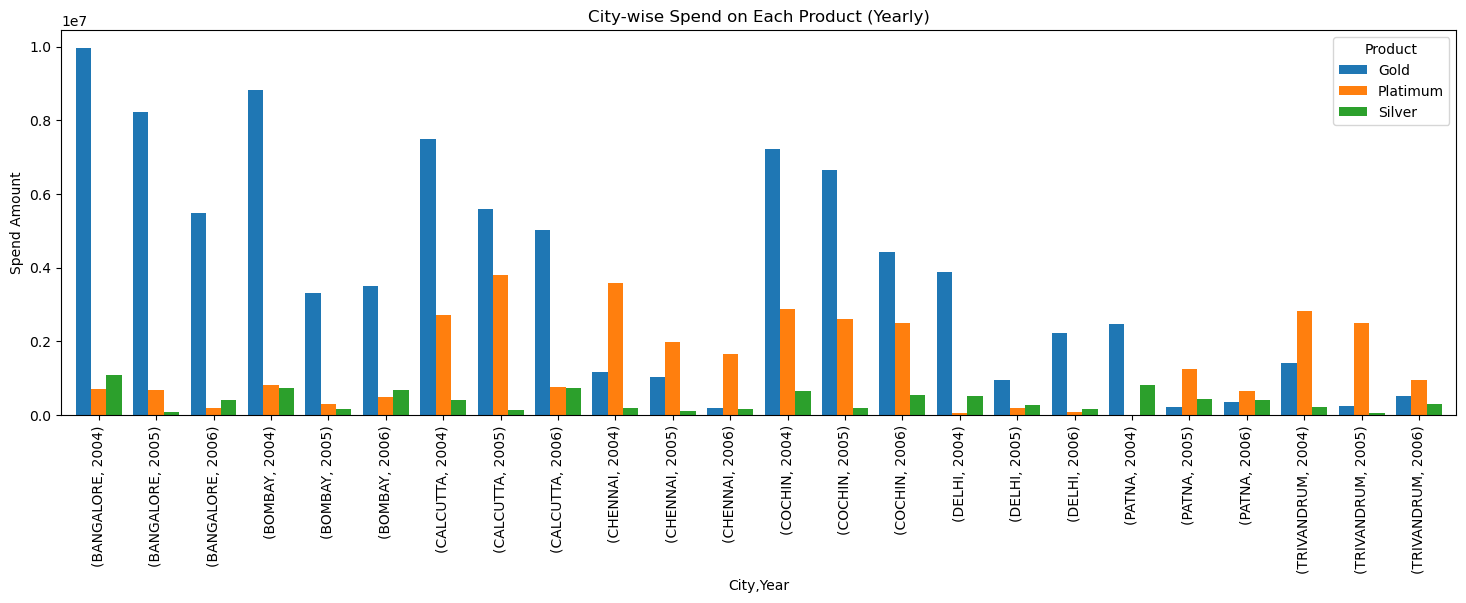

In [38]:
city_product_spend_yearly.plot(kind="bar", figsize=(18, 5), width = 0.8)
plt.title('City-wise Spend on Each Product (Yearly)')
plt.ylabel('Spend Amount')
plt.show()

### 4. Create graphs for
### a. Monthly comparison of total spends, city wise

In [39]:
monthly_spends_citywise = pd.pivot_table(data = merged_df,index=['City'],columns='Month_of_Year', values='Spend_Amount', aggfunc='sum')
monthly_spends_citywise

Month_of_Year,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,11290794.39,6764477.32,2606522.60,1664381.96,1771196.35,808502.84,100002.00,75862.19,108506.20,277778.99,1042310.89,289884.23
BOMBAY,7975013.00,2158509.89,3600213.77,539629.98,1147893.04,131201.58,127726.32,NaN,1007577.68,592550.94,1476313.84,50001.00
CALCUTTA,10818287.40,7256889.22,2464611.36,968101.82,1804705.45,553227.98,1203898.24,640567.78,509350.86,NaN,457547.48,NaN
CHENNAI,4512252.68,852149.85,1606456.05,10000.00,1617739.22,310174.49,NaN,NaN,417226.49,NaN,489749.85,223628.27
COCHIN,12572671.27,3878831.66,2313585.18,1635911.95,2462419.10,940714.20,399778.43,1255620.24,366104.29,468878.97,839801.62,519500.58
DELHI,3990539.40,719317.82,2013841.58,100002.00,702921.18,NaN,NaN,75079.67,NaN,NaN,193939.97,528750.85
PATNA,3614667.19,1286564.56,786383.93,50000.00,487312.66,150000.00,NaN,NaN,NaN,221293.03,NaN,NaN
TRIVANDRUM,4613771.42,1298410.11,1067471.52,152102.82,1218864.22,309015.26,10001.00,NaN,NaN,NaN,60263.41,237335.43


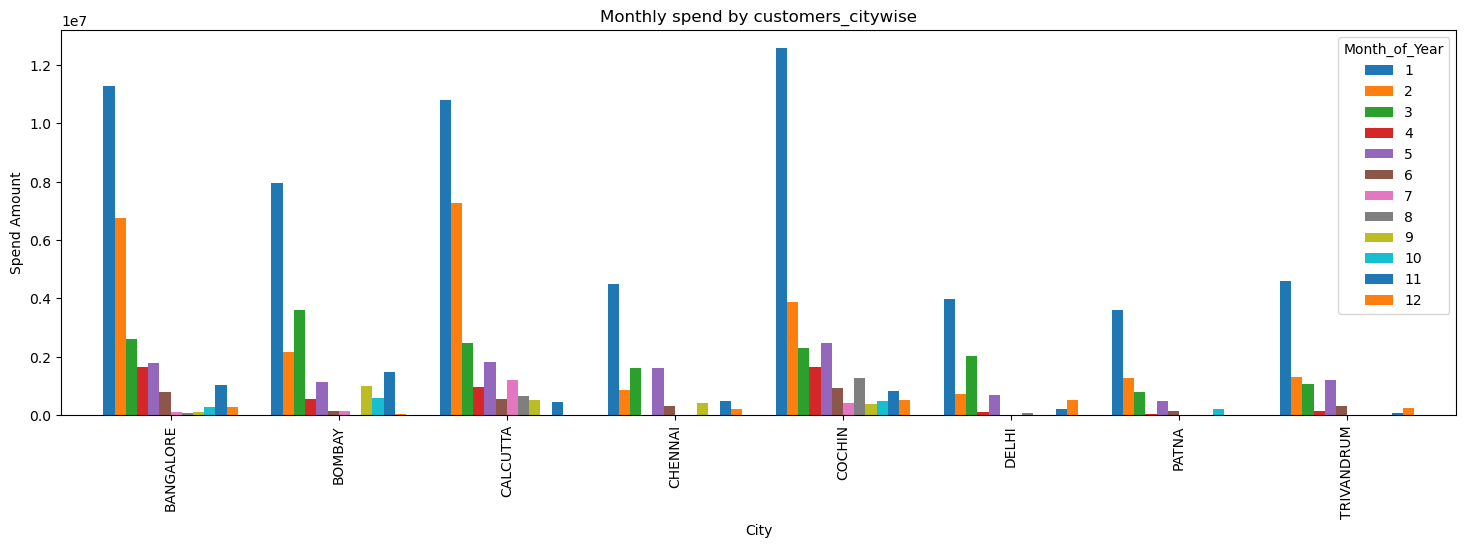

In [40]:
monthly_spends_citywise.plot(kind="bar", figsize=(18, 5), width = 0.8)
plt.title('Monthly spend by customers_citywise')
plt.ylabel('Spend Amount')
plt.show()

### 4. b. Comparison of yearly spend on air tickets

In [41]:
air_tickets = merged_df[merged_df['Type'] == 'AIR TICKET']

yearly_spend = air_tickets.groupby('Year')['Spend_Amount'].sum().reset_index()
yearly_spend

,Year,Spend_Amount
0,2004,4048058.24
1,2005,3758906.16
2,2006,2121174.01


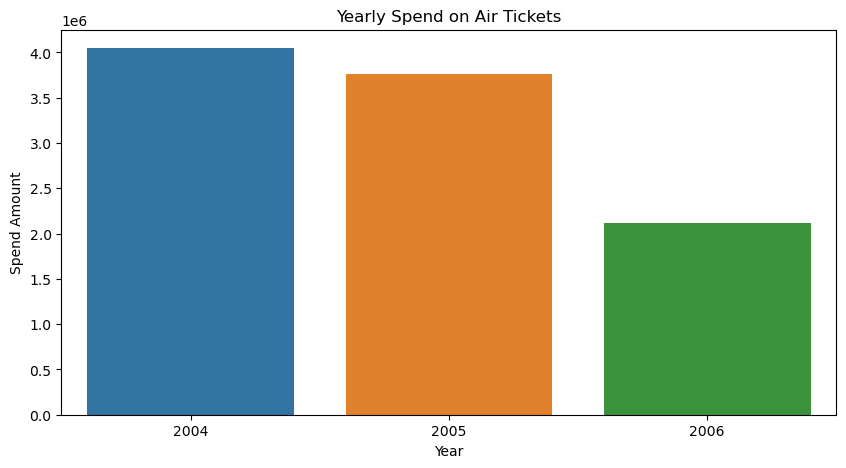

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x='Year', y='Spend_Amount', data=yearly_spend)
plt.title('Yearly Spend on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Spend Amount')
plt.show()

### 4. c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [43]:
# Group by 'Month_of_Year' and 'Product' to calculate total spend for each product in each month
monthly_spend_per_product = merged_df.groupby(['Month_of_Year', 'Product'])['Spend_Amount'].sum().unstack()

monthly_spend_per_product

Product,Gold,Platimum,Silver
Month_of_Year,,,
1,40694326.60,14491018.70,4202651.45
2,15526858.59,7850078.64,838213.20
3,10062396.43,4183915.19,2212774.37
4,4235479.41,233558.26,651092.86
5,6521270.30,3826324.36,865456.56
6,2190078.24,674426.64,338331.47
7,1546999.14,194404.85,100002.00
8,1656089.03,315961.18,75079.67
9,1796067.12,562696.90,50001.50


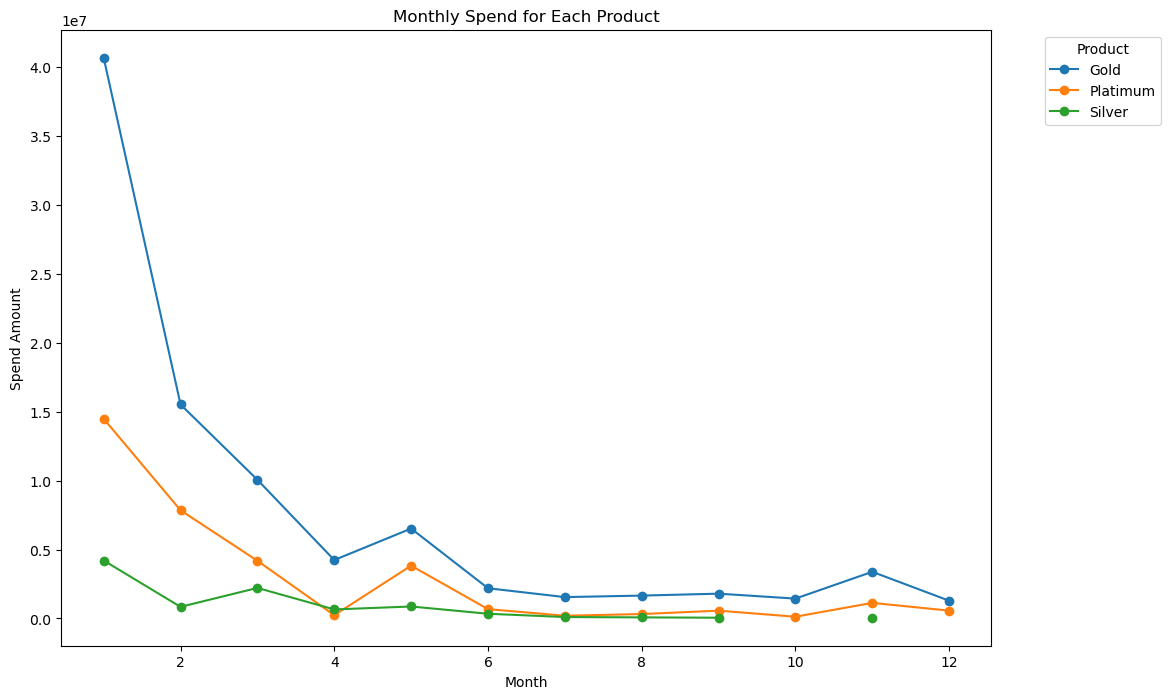

In [44]:
monthly_spend_per_product.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Monthly Spend for Each Product')
plt.xlabel('Month')
plt.ylabel('Spend Amount')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis:

### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [44]:
# The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly)

In [46]:
def top_customers(merged_df, product, time_period):
    
    product_filtered = merged_df[merged_df['Product'] == product]

    product_filtered['Year'] = product_filtered['Month'].dt.year
    product_filtered['Month'] = product_filtered['Month'].dt.month

    grouped = product_filtered.groupby(['City', 'Customer', time_period])['Repayment_Amount'].sum().reset_index()

    top_customers = grouped.groupby(['City']).apply(lambda x: x.nlargest(10, 'Repayment_Amount')).reset_index(drop=True)

    return top_customers

In [47]:
result = top_customers(merged_df, 'Silver', 'Year')
print(result)         #specified by the product (Gold/Silver/Platinum) and time period (yearly or monthly)

          City Customer  Year  Repayment_Amount
0    BANGALORE      A23  2004         805087.59
1    BANGALORE      A18  2004         590352.08
2    BANGALORE      A59  2006         500015.00
3    BANGALORE      A59  2004         376548.50
4    BANGALORE      A18  2006         300000.00
5    BANGALORE      A76  2005         265619.05
6    BANGALORE      A23  2005         100001.00
7    BANGALORE      A72  2004         100000.00
8    BANGALORE      A77  2006           3159.62
9       BOMBAY      A22  2004        1449814.89
10      BOMBAY      A80  2006         481205.64
11      BOMBAY      A22  2006         345271.83
12      BOMBAY      A22  2005         300000.00
13      BOMBAY      A75  2005         100003.00
14    CALCUTTA      A58  2006         402893.23
15    CALCUTTA      A58  2004         333811.62
16    CALCUTTA       A2  2004         300000.00
17    CALCUTTA       A2  2005         200000.00
18    CALCUTTA      A87  2006         100003.00
19    CALCUTTA      A73  2005         10

In [51]:
# Other way
# By particular City, Example= BANGALORE

def top_customers_analysis(merged_df):
    product = input("Enter the product name: ")
    city = input("Enter the city name: ")
    time_period = input("Enter the time period (yearly or monthly): ")
    
    merged_df['Year'] = merged_df['Month'].dt.year
    merged_df['Month_of_Year'] = merged_df['Month'].dt.month

    filtered_data = merged_df[(merged_df['Product'] == product) & (merged_df['City'] == city)]

    if time_period.lower() == 'yearly':
        analysis = filtered_data.groupby(['City', 'Year', 'Customer'])['Repayment_Amount'].sum() \
                    .groupby(['City', 'Year']).nlargest(10).reset_index(level=[0, 1], drop=True)
    elif time_period.lower() == 'monthly':
        analysis = filtered_data.groupby(['City', 'Year', 'Month_of_Year', 'Customer'])['Repayment_Amount'].sum() \
                    .groupby(['City', 'Year', 'Month_of_Year']).nlargest(10).reset_index(level=[0, 1, 2], drop=True)
    else:
        return "Invalid time period. Please specify 'yearly' or 'monthly'."
    
    return analysis

result = top_customers_analysis(merged_df)
print(result)

Enter the product name: Silver
Enter the city name: BANGALORE
Enter the time period (yearly or monthly): yearly
City       Year  Customer
BANGALORE  2004  A23         805087.59
                 A18         590352.08
                 A59         376548.50
                 A72         100000.00
           2005  A76         265619.05
                 A23         100001.00
           2006  A59         500015.00
                 A18         300000.00
                 A77           3159.62
Name: Repayment_Amount, dtype: float64


In [52]:
product = input("Enter the product name: ")
year = int(input("Enter the year: "))
city = input("Enter the city name: ")

filtered_df = merged_df.copy()
if product:
    filtered_df = filtered_df[filtered_df['Product'] == product]
if year:
    filtered_df = filtered_df[filtered_df['Year'] == year]
if city:
    filtered_df = filtered_df[filtered_df['City'] == city]

grouped = filtered_df.groupby(['City', 'Customer', 'Year'])['Repayment_Amount'].sum().reset_index()
top_customers = grouped.groupby('City').apply(lambda x: x.nlargest(10, 'Repayment_Amount')).reset_index(drop=True)
print(top_customers)

Enter the product name: Silver
Enter the year: 2004
Enter the city name: BANGALORE
        City Customer  Year  Repayment_Amount
0  BANGALORE      A23  2004         805087.59
1  BANGALORE      A18  2004         590352.08
2  BANGALORE      A59  2004         376548.50
3  BANGALORE      A72  2004         100000.00
